### Examples for creating graphs

- From set of vertices and set of edges
- From adjacency list
- From adjacency matrix

Show for both directed and undirected graphs

---

Create undirected graphs and directed graphs from vertex set and edge set

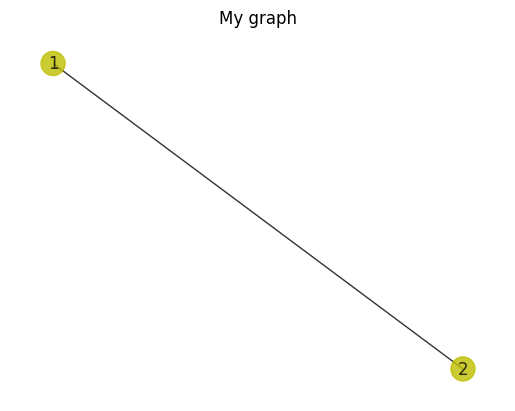

In [1]:
import network_utilities as nu
G = nu.vertex_edge_sets_to_graph({1,2}, {(1,2)})
nu.show_graph(G)


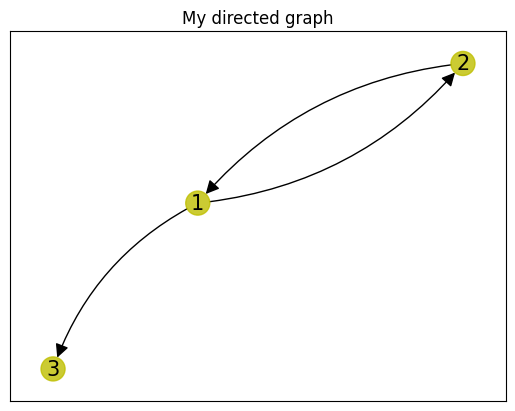

In [2]:
G = nu.vertex_edge_sets_to_digraph({1,2,3}, 
                                   {(1,2),
                                    (2,1),
                                    (1,3)})
nu.show_digraph(G)

---

Create undirected and directed graphs from adjacency list

In [6]:
## Error conditions 
G = nu.adjacency_list_to_graph(dict())

IllegalGraphRepresentation: Adjacency list had no vertices

Notice how this example _raises_ the `IllegalGraphRepresentation` error.

In [7]:
## incorrect adjacency list
G = nu.adjacency_list_to_graph({1:{2}, 2:set()})

IllegalGraphRepresentation: Adjacency list for undirected graph does not have all required edges

Again, notice how this example _raises_ the `IllegalGraphRepresentation` error.


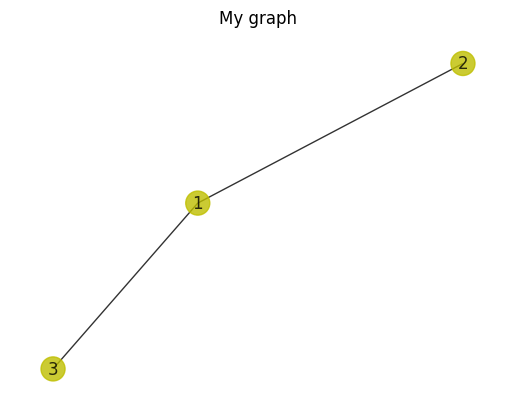

In [8]:
## Correct adjacency list
G = nu.adjacency_list_to_graph({1:{2,3}, 2:{1}, 3:{1}})
nu.show_graph(G)

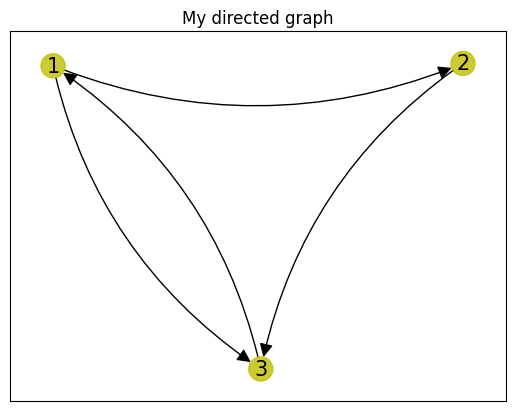

In [9]:
## Directed graph
G = nu.adjacency_list_to_digraph({1:{2,3}, 2:{3}, 3:{1}})
nu.show_digraph(G)

---

### Writing Tests

We'll sometimes use `pytest` on homework as a way of blending programming with the related mathc concepts. The idea is that you'll create problems where your code should fail and other problems where your code should succeed. I'll try to create homework assignments where you'll need to use the math or formalisms taught in class to create your tests. This will (hopefully) create a learning activity where have to "do the math" in order to write the tests. 

I now want to demonstrate the pattern for doing this so that we're all using a similar structure (which makes assignment creation and assessment feasible for an entire class).


#### Negative Tests

The following code demonstrates a pattern for writing negative tests.

In [15]:
import pytest
from network_utilities import IllegalGraphRepresentation

def test_adjacency_list_graph_creation_failures():
    ########################################
    ## Empty adjacency list negative test ##
    ########################################
    # What I expect
    expected_error_message_empty_list: str = "Adjacency list had no vertices"
    
    # Instantiate adjacency list
    empty_adjacency_list = dict()
    
    # when
    with pytest.raises(IllegalGraphRepresentation ) as exception:
        _ = nu.adjacency_list_to_graph(empty_adjacency_list)

    # then
    assert (
        expected_error_message_empty_list == str(exception.value)
    ) , f"Incorrect error message \"{exception.value}\" for empty adjacency list"
    
    #################################
    ## Missing edges negative test ##
    #################################
    # What I expect
    expected_error_message_missing_edges: str = "Adjacency list for undirected graph does not have all required edges"

    # Instantiate adjacency list
    missing_edges_adjacency_list = {1:{2}, 2:set()}
    
    # when
    with pytest.raises(IllegalGraphRepresentation ) as exception:
        _ = nu.adjacency_list_to_graph(missing_edges_adjacency_list)

    # then
    assert (
        expected_error_message_missing_edges == str(exception.value)
    ) , f"Incorrect error message \"{exception.value}\" for adjacency list that is missing edges"

    # If assertion satisfied
    print("negative tests for adjacency list functions passed")

Run the test

In [16]:
test_adjacency_list_graph_creation_failures()

negative tests for adjacency list functions passed


Notice the pattern in this negative test:
- define a test function
- tell the test function what error message to expect for this negative test
- instantiate two relations
- capture the `exception` that is `raise`d when the `adjacency_list_to_graph` function is called
- assert that the expected error message matches the error message returned from `adjacency_list_to_graph`
- run the test by calling `test_adjacency_list_graph_creation_failures()`

Line 12 is the code that captures the exception. It might help to look at the things that make up that line:
- The keyword `with` tells us that we are handling irregular program termination in our negative test
- The code segment `pytest.raises` indicates that we are looking for a particular exception being raised
- The argument `IllegalGraphRepresentation` is the kind of exception we are looking for
- The code segment `as exception` says that we want to capture the object created by the exception in a variable called `exception`

The underscores on lines 16 and 34 say that we know the `adjacency_list_to_graph` function returns something, but we'll never use it so we aren't going to name it.

Lines 19 and 37 use the `value` stored in the `exception` object. This `value` is the error message that is written when the exception occurs. Lines 20 and 38 compare the actual error message with the error message that we knew should occur during the negative test.

---

#### Positive Tests
We also want _positive tests_ that demonstrate that our code behaves like we want it to. We do basically the same thing as with the negative test, but we don't use the `with pytest.raises` code when we create our graph. The following code demonstrates two positive tests, both of which are in the `test_adjacency_list_graph_creation.py` file. 

In [103]:
def test_adjacency_list_three_vertex_graph_creation():
    ##############################
    ## Two vertex positive test ##
    ##############################
    # What I expect
    expected_vertex_list: list[int] = [1,2,3]
    expected_edge_set: set[tuple[int,int]] = {(1,2), (1,3)}
    
    # Instantiate adjacency list
    adjacency_list: dict[int, set[int]] = {3:{1}, 1:{2,3}, 2:{1}}

    # when
    G = nu.adjacency_list_to_graph(adjacency_list)
    actual_edge_set = set(tuple(sorted(edge)) for edge in G.edges())
    print(G.edges())
    print(actual_edge_set)
    print(expected_edge_set)
    print(expected_edge_set == actual_edge_set)

    # then
    assert expected_vertex_list == sorted(list(G.nodes()))
    assert actual_edge_set == expected_edge_set


Run tests

In [104]:
test_adjacency_list_three_vertex_graph_creation()

[(3, 1), (1, 2)]
{(1, 2), (1, 3)}
{(1, 2), (1, 3)}
True


When networkx creates an undirected graph, the edges are stored as tuples, and the order of the edge endpoints can be in any order. The code on line 14 makes sure that the endpoints of the edge are sequential. I printed out some intermediate steps to illustrate what the code does. Note that the code isn't written for efficiency, so you can probably find better ways to do this test.

---

#### Creating test files in the tests directory

Open up the `test_adjacency_list.py` in the `tests` directory and compare the negative tests from that file to the test written above.  Notice that I've split the negative tests for creating an undirected graph from an adjacency list into two different functions, and notice that there are other positive and negative tests.

Assuming that you've implemented all the steps in the `README`, you should be able to click on the test tube icon in VSCode and see all the tests found in the `test_adjacency_list_graph_creation.py` file. 

---

Create undirected and directed graphs from adjacency matrix

In [105]:
import numpy as np

## Incorrect adjacency matrix ##
G = nu.adjacency_matrix_to_graph(np.array([]))

IllegalGraphRepresentation: Adjacency matrix had no vertices

In [11]:
## Asymmetric adjacency matrix ##
G = nu.adjacency_matrix_to_graph(np.array([[0,1],[0,0]]))

IllegalGraphRepresentation: Adjacency matrix is not symmetric

True


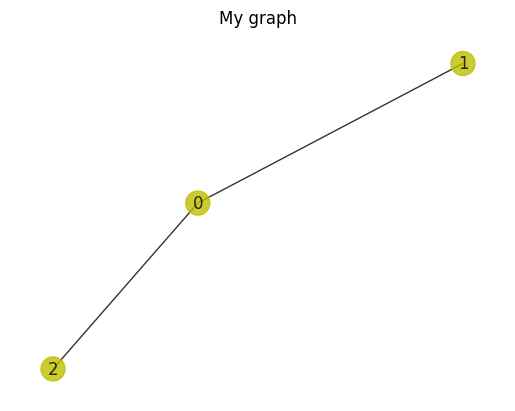

In [12]:
## Undirected graph
A = np.array([[0,1,1],[1,0,0],[1,0,0]])
print(np.array_equal(A, A.T))
G = nu.adjacency_matrix_to_graph(np.array([[0,1,1],
                                           [1,0,0],
                                           [1,0,0]]))
nu.show_graph(G)

True


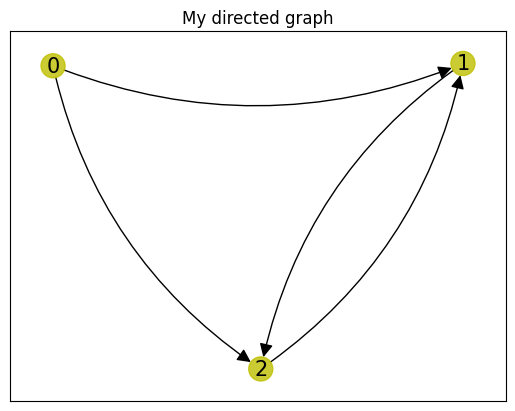

In [13]:
## Undirected directed graph
A = np.array([[0,1,1],[1,0,0],[1,0,0]])
print(np.array_equal(A, A.T))
G = nu.adjacency_matrix_to_digraph(np.array([[0,1,1],
                                           [0,0,1],
                                           [0,1,0]]))
nu.show_digraph(G)

Notice how the adjacency matrix defaults to numbering nodes at 0.